In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_excel("../../dataset/online_retail_II.xlsx")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


from above i analyse that the min quantitiy is in minus and the price is in minus..

also the customerid is less than thee total no. of cusstumer means missing the customer id in data

In [7]:
df.describe( include='O')
# 

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [8]:
# checking the  missing customer id 
df[df['Customer ID'].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
# in above info .. we clealy see that there are missing values in Customer ID  and  without customer id we cannot do any customer segmentation so we will drop those missing values laater on

In [10]:
#now looking for negative qantity 
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [11]:
df["Invoice"] = df["Invoice"].astype('str')
df[df["Invoice"].str.match("^\\d{6}$")== True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [12]:
# now checking only C is present in invoise or some othe value also present

df["Invoice"].str.replace("[0-9]","", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

we sawa that the Letter also prresent in the invoice number

In [13]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


only 3   invoice haveing A which doesnot means any thinf

In [14]:
df["StockCode"] = df["StockCode"].astype('str')
df[(df["StockCode"].str.match("^\\d{5}$")== False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]")== False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', 'C3', 'SP1002', 'AMAZONFEE'], dtype=object)

In [15]:
df[df["StockCode"].str.contains("DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Data Cleaning


In [17]:
cleaned_df = df.copy()

In [18]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype('str')

mask = (cleaned_df["Invoice"].str.match("^\\d{6}$")== True) 

cleaned_df = cleaned_df[mask]

In [19]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype('str')
mask = (cleaned_df["StockCode"].str.match("^\\d{5}$")== True) | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z] +$")== True) | (cleaned_df["StockCode"].str.match("^PADS$")== True)
cleaned_df = cleaned_df[mask]
cleaned_df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,437345.000000,437345,437345.000000,350943.000000
mean,11.213061,2010-07-03 09:58:02.880335104,3.366250,15360.244439
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-28 11:02:00,1.250000,13985.000000
50%,4.000000,2010-07-15 11:08:00,2.100000,15311.000000
75%,12.000000,2010-10-18 14:07:00,4.210000,16797.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,109.000658,NaN,5.226588,1678.202935


driping the null custommer


In [21]:
cleaned_df = df.dropna(subset=['Customer ID'])

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417534.000000,417534,417534.000000,417534.000000
mean,12.758815,2010-07-01 01:12:19.787609856,3.887547,15360.645478
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 11:26:00,1.250000,13983.000000
50%,4.000000,2010-07-08 19:12:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,101.220424,NaN,71.131797,1680.811316


In [23]:
len(cleaned_df[cleaned_df['Price'] ==0])

31

In [24]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [25]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,417503.000000,417503,417503.000000,417503.000000
mean,12.757678,2010-07-01 01:17:11.385403392,3.887836,15360.731300
min,-9360.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 11:26:00,1.250000,13983.000000
50%,4.000000,2010-07-08 19:12:00,1.950000,15311.000000
75%,12.000000,2010-10-14 14:08:00,3.750000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,101.219348,NaN,71.134430,1680.779044


In [26]:
cleaned_df["Price"].min()

np.float64(0.001)

now how much data we loss during the cleaning

In [27]:
len(cleaned_df)/len(df)

0.7945461223573205

#feature Engineering

In [28]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [29]:
# aagregate  the data  and grouped by

aggregated_df  = cleaned_df.groupby(by='Customer ID', as_index=False).agg( monetaryValue = ('SalesLineTotal','sum'),
                                                                          frequency = ('Invoice','nunique'),
                                                                          LastInvoiceDate = ('InvoiceDate','max')                                                                          
                                                                          )
aggregated_df.head()

,Customer ID,monetaryValue,frequency,LastInvoiceDate
0,12346.0,-64.68,15,2010-10-04 16:33:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,222.16,1,2010-09-27 14:59:00
3,12349.0,2646.99,4,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [30]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency
0,12346.0,-64.68,15,2010-10-04 16:33:00,66
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73
3,12349.0,2646.99,4,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


plotting

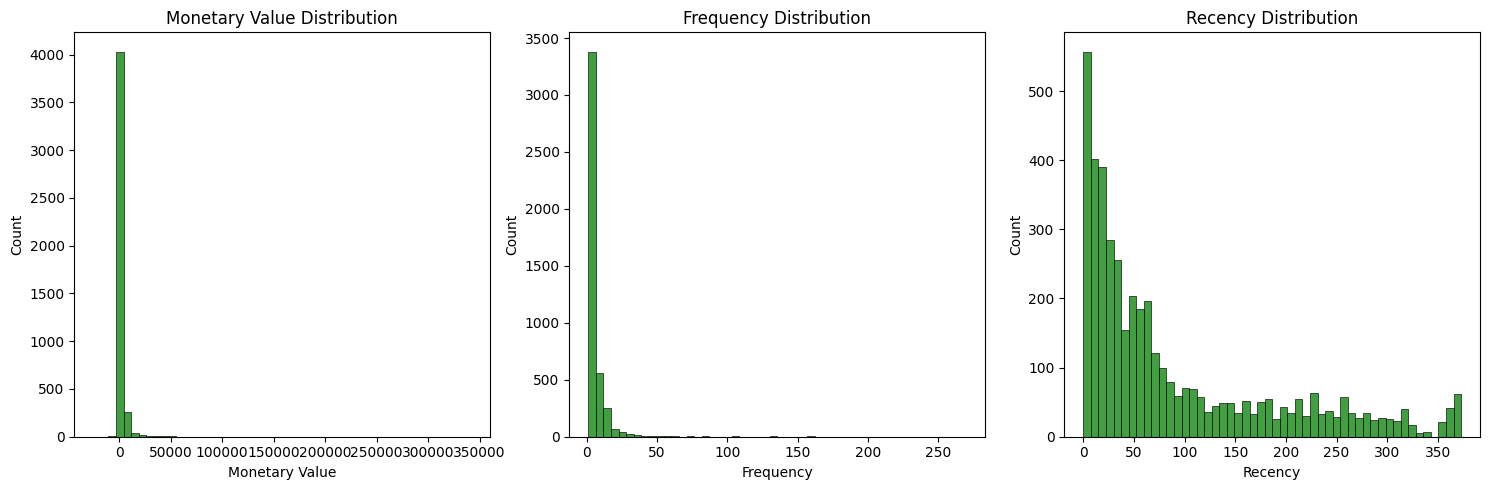

In [31]:
plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.histplot(aggregated_df['monetaryValue'], bins=50,color='green', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.histplot(aggregated_df['frequency'], bins=50,color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.histplot(aggregated_df['Recency'], bins=50,color='green', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


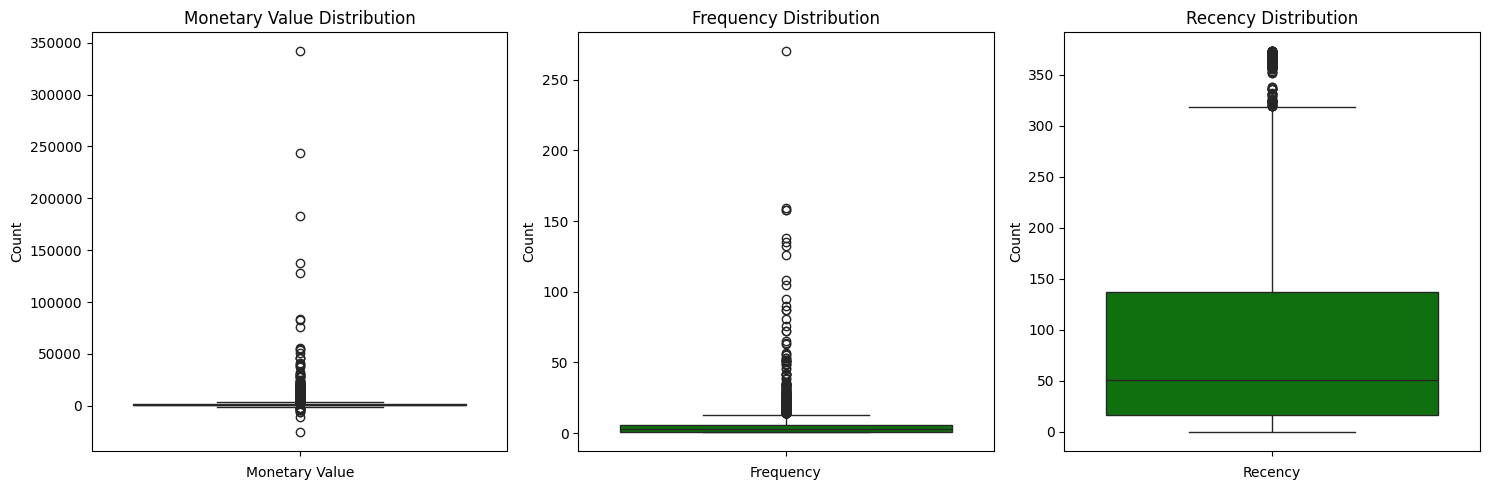

In [32]:
# box plots to identify outliers

plt.figure(figsize=(15,5))


plt.subplot(1,3,1)
sns.boxplot(aggregated_df['monetaryValue'], color='green')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['frequency'], color='green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'], color='green')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [39]:

# separate out lier and  separate  analysis

M_Q1 = aggregated_df['monetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['monetaryValue'].quantile(0.75)

# interquartile range

M_IQR = M_Q3 - M_Q1


monetary_outliers_df = aggregated_df[(aggregated_df['monetaryValue'] < (M_Q1 - 1.5 * M_IQR)) | (aggregated_df['monetaryValue'] > (M_Q3 + 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency
count,432.000000,432.000000,432.000000,432,432.000000
mean,15110.884259,11362.833532,21.106481,2010-11-09 19:26:13.055555584,29.752315
min,12357.000000,-25111.090000,1.000000,2010-02-23 15:17:00,0.000000
25%,13596.750000,4305.855000,9.000000,2010-11-10 12:11:00,3.000000
50%,15014.000000,5991.450000,15.000000,2010-11-28 11:36:30,11.000000
75%,16688.000000,9522.865000,23.250000,2010-12-06 12:09:45,29.000000
max,18260.000000,341776.730000,270.000000,2010-12-09 19:32:00,289.000000
std,1738.348272,25140.179129,25.293961,NaN,50.336605


In [41]:
#  same for frequency
F_Q1 = aggregated_df['frequency'].quantile(0.25)
F_Q3 = aggregated_df['frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['frequency'] < (F_Q1 - 1.5 * F_IQR)) | (aggregated_df['frequency'] > (F_Q3 + 1.5 * F_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency
count,335.000000,335.000000,335.000000,335,335.000000
mean,15233.561194,12243.943149,27.277612,2010-11-23 18:43:52.656716288,15.782090
min,12346.000000,-486.700000,14.000000,2010-07-18 13:54:00,0.000000
25%,13704.500000,3537.735000,15.000000,2010-11-20 13:14:30,2.000000
50%,15222.000000,5476.470000,19.000000,2010-12-02 08:52:00,7.000000
75%,16724.000000,10200.765000,26.000000,2010-12-07 12:44:00,19.000000
max,18260.000000,341776.730000,270.000000,2010-12-09 19:32:00,144.000000
std,1747.293900,28246.352991,26.453845,NaN,23.593304


In [43]:
# creating df  for non outliers
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency
count,3859.000000,3859.000000,3859.000000,3859,3859.000000
mean,15379.285566,831.205952,3.351905,2010-09-01 21:17:58.289712384,98.672195
min,12347.000000,-1598.670000,1.000000,2009-12-01 09:55:00,0.000000
25%,13912.500000,252.580000,1.000000,2010-07-05 13:56:00,22.000000
50%,15392.000000,550.950000,2.000000,2010-10-12 15:09:00,58.000000
75%,16856.500000,1199.170000,5.000000,2010-11-17 14:59:00,157.000000
max,18287.000000,3686.610000,13.000000,2010-12-09 20:01:00,373.000000
std,1692.606188,796.110556,2.739517,NaN,100.158636


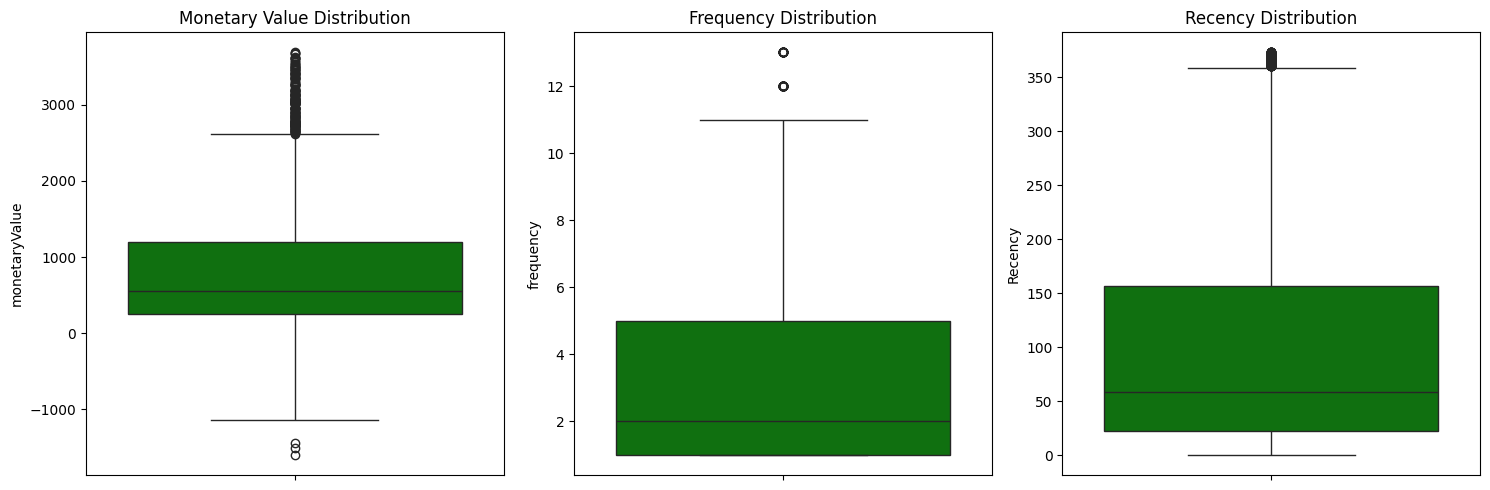

In [44]:
# ploting the box plot again after removing outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.boxplot(non_outliers_df['monetaryValue'], color='green')
plt.title('Monetary Value Distribution')
#  --- IGNORE ---

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['frequency'], color='green')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'], color='green')
plt.title('Recency Distribution')

plt.tight_layout()
plt.show()

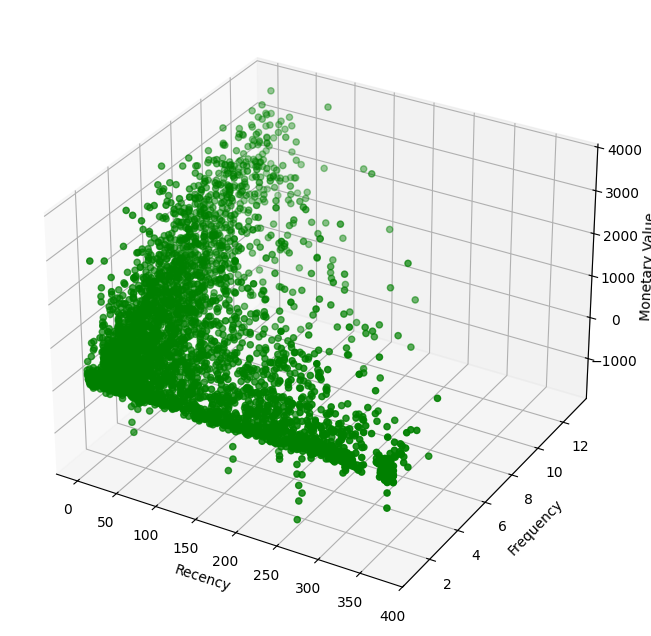

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(non_outliers_df['Recency'], non_outliers_df['frequency'], non_outliers_df['monetaryValue'], c='g', marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.show()

now using the stander scaler for the stadanrize the value of moneytory value


In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['Recency', 'frequency', 'monetaryValue']])

scaled_data

array([[-0.96531589, -0.49354677,  0.61822798],
       [-0.25634856, -0.8586219 , -0.76512599],
       [-0.56589768,  0.2366035 ,  2.28111453],
       ...,
       [ 1.96042255, -0.8586219 , -0.5077917 ],
       [ 0.12309875, -0.12847163,  0.44876976],
       [-0.81553406,  0.60167863,  1.89621861]], shape=(3859, 3))

In [52]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['Recency', 'frequency', 'monetaryValue'])
scaled_data_df.head()

,Recency,frequency,monetaryValue
1,-0.965316,-0.493547,0.618228
2,-0.256349,-0.858622,-0.765126
3,-0.565898,0.236604,2.281115
4,-0.885432,-0.858622,-0.666170
5,-0.885432,-0.493547,-0.612313


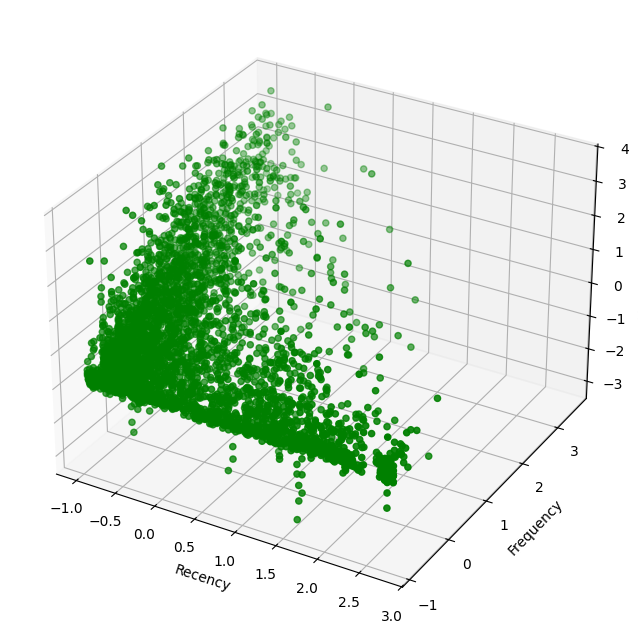

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(scaled_data_df['Recency'], scaled_data_df['frequency'], scaled_data_df['monetaryValue'], c='g', marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.show()

Kmeans  Clustering
-k  means how many cluster we use
- to determine how many cluster are perfect for our data we use the  overmethod to determine

In [54]:
import sklearn.cluster as kmeans

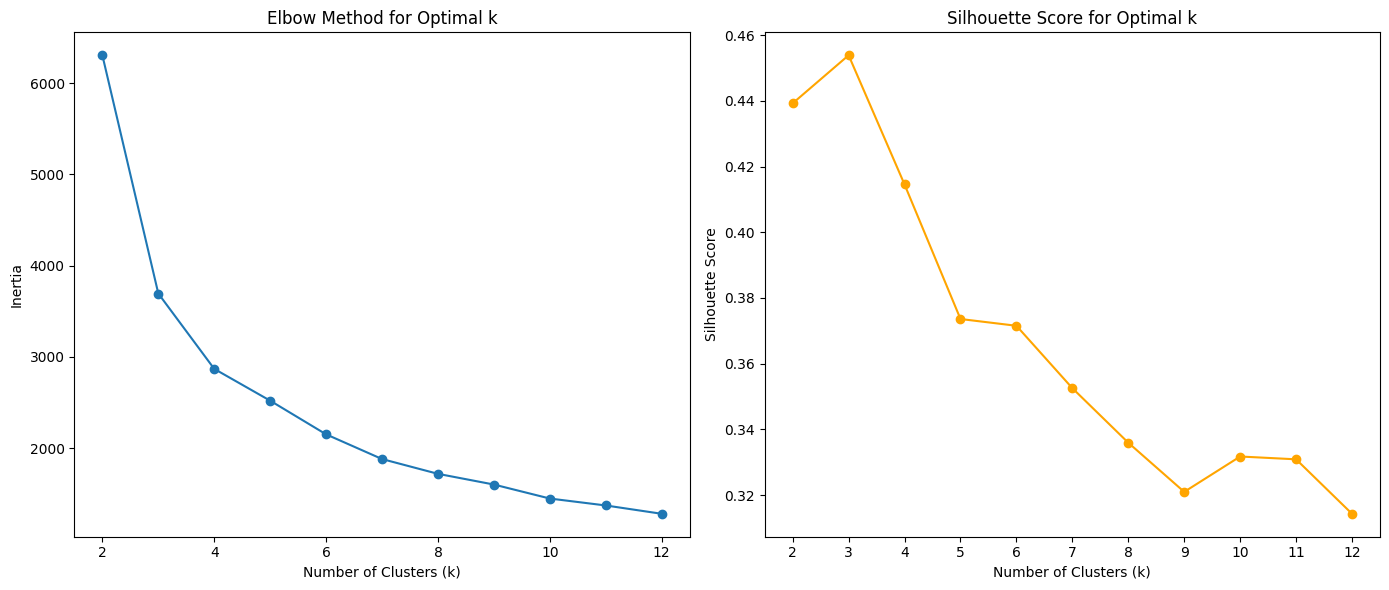

In [59]:
max_k =12

inertia = []
k_values = range(2, max_k + 1)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_level = kmeans.fit_predict(scaled_data_df)
    silhouette = silhouette_score(scaled_data_df, cluster_level)
    silhouette_scores.append(silhouette)
    inertia.append(kmeans.inertia_)
    

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# for silhoutte score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

form above  we see that  4 cluster score is better than the 5 so we take the k values is  4

**silhouette score**
high score indicate the model are overlap between the cluster which is good
- where as low score  means alot of over lap
- the silhoutte score range bettwenn -1 to 1 , a higher  value indicate more distinct cluster


In [60]:
# final kmeans model with optimal k
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_levels = kmeans.fit_predict(scaled_data_df)
cluster_levels

array([2, 0, 2, ..., 1, 2, 2], shape=(3859,), dtype=int32)

In [61]:
non_outliers_df['Cluster'] = cluster_levels
non_outliers_df.head()

C:\Users\yadav\AppData\Local\Temp\ipykernel_3884\3382287365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_levels


,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency,Cluster
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,222.16,1,2010-09-27 14:59:00,73,0
3,12349.0,2646.99,4,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,0
5,12352.0,343.80,2,2010-11-29 10:07:00,10,0


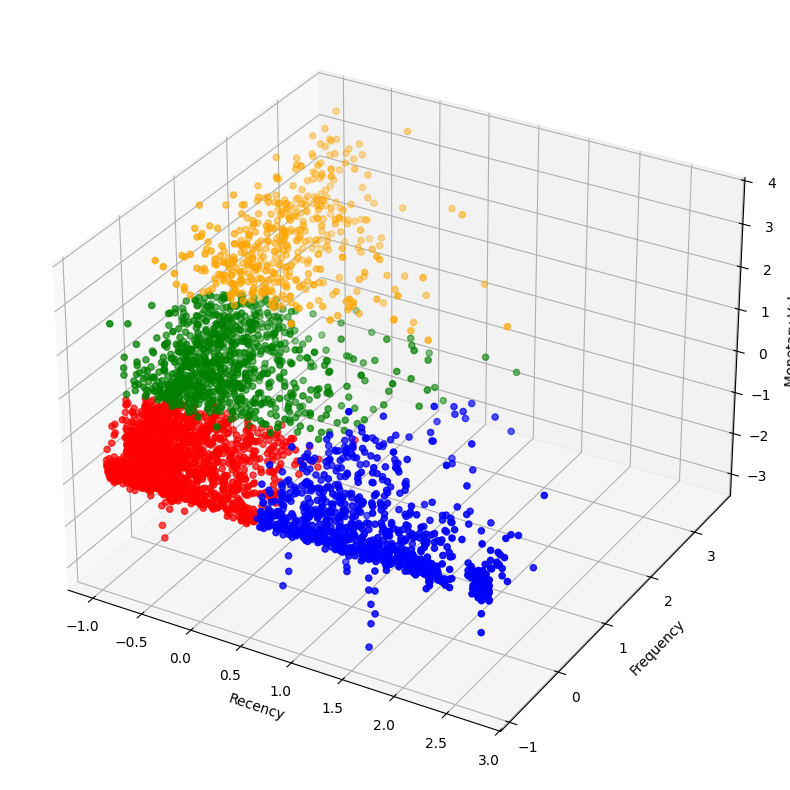

In [64]:
# now leveling the clusters  based on monetary value
cluster_colors ={0:'red', 1:'blue', 2:'green', 3:'orange'}

color = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(scaled_data_df['Recency'], scaled_data_df['frequency'], scaled_data_df['monetaryValue'], c=color, marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.show()

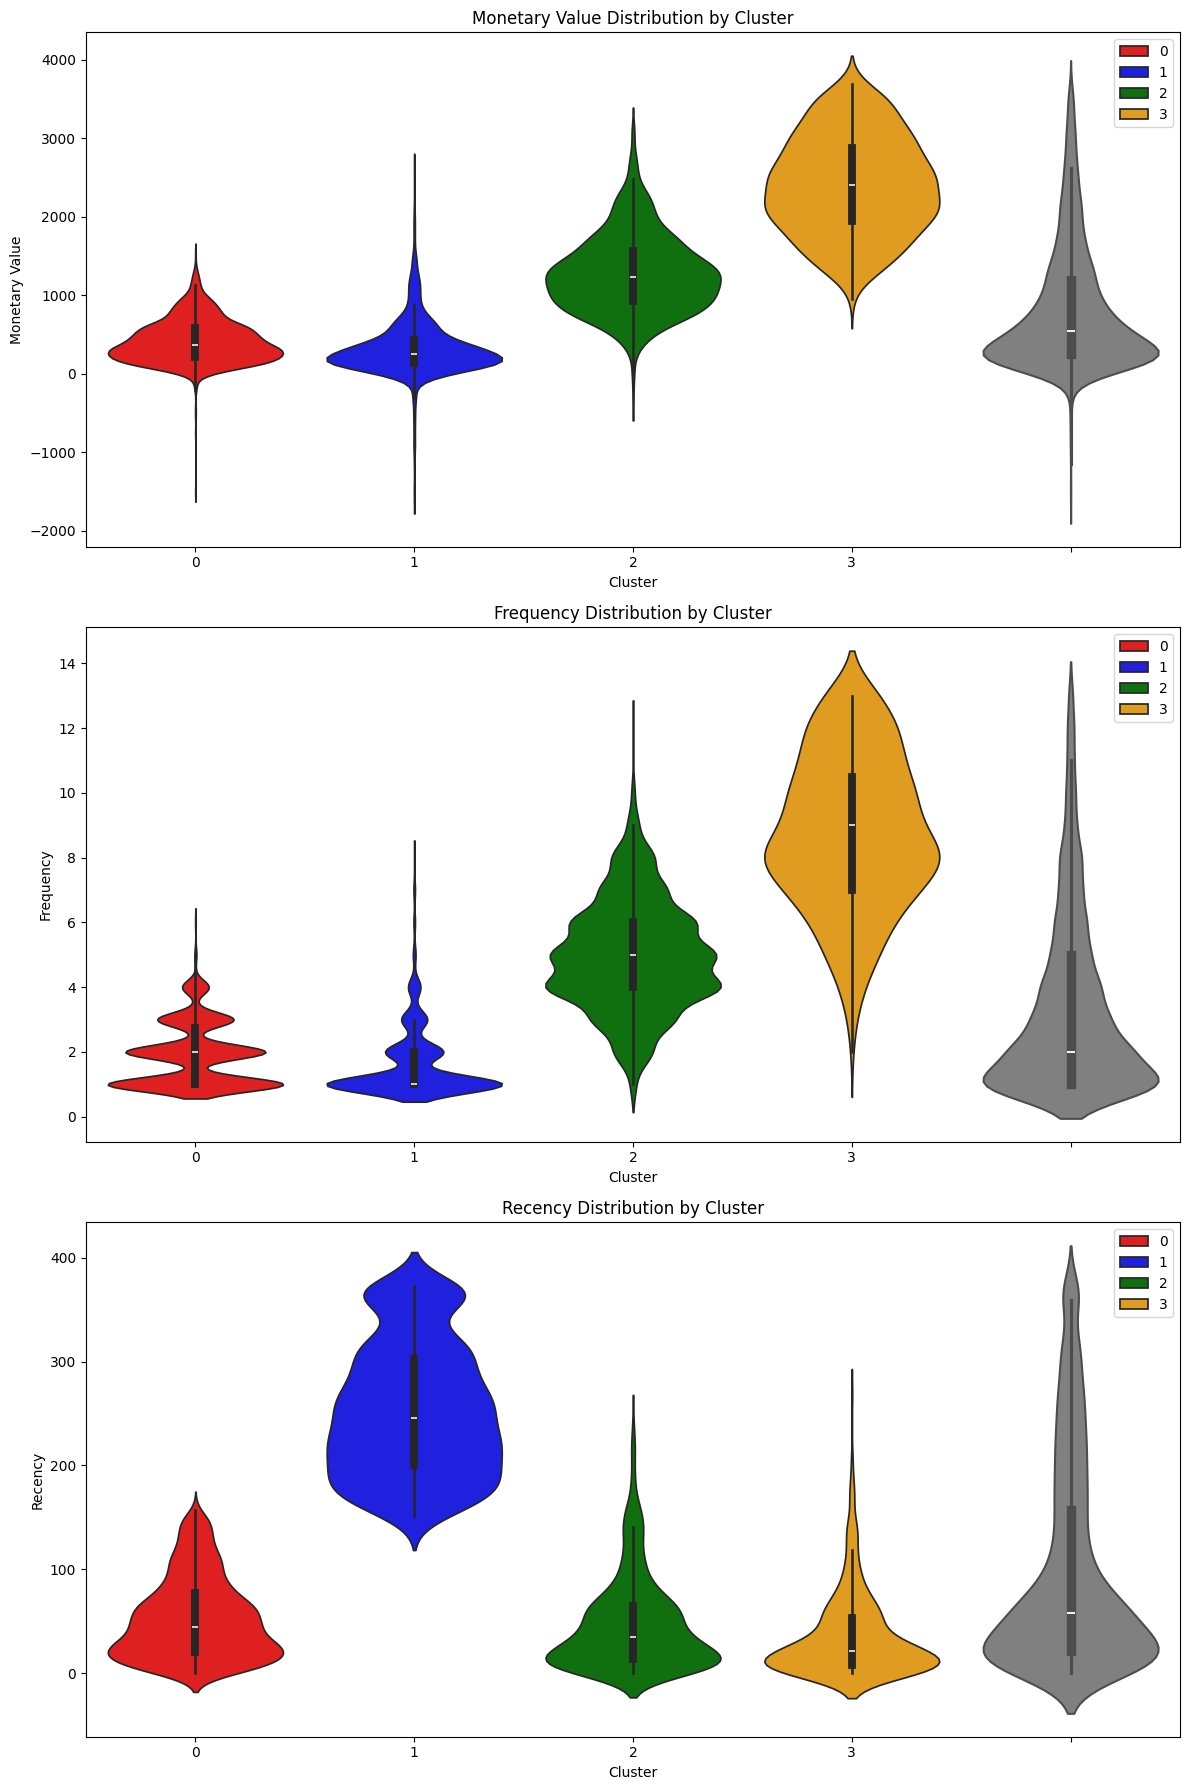

In [68]:
# using vioinplot to visualize the clusters
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['monetaryValue'], palette=cluster_colors,  hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['monetaryValue'],color ='grey', linewidth=1.5)
plt.title('Monetary Value Distribution by Cluster')
plt.ylabel('Monetary Value')


plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['frequency'],color ='grey', linewidth=1.5)
plt.title('Frequency Distribution by Cluster')
plt.ylabel('Frequency')


plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'],color ='grey', linewidth=1.5)
plt.title('Recency Distribution by Cluster')
plt.ylabel('Recency')
plt.tight_layout()
plt.show()

1.cluster 0 : retain 
 loyal cluster

2.cluster 1 : re Engage

3. cluster 2: Nurture
4. custer 3 : Reward

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices
monetary_only_outliers_df = monetary_outliers_df.drop(index=overlap_indices)
frequency_only_outliers_df = frequency_outliers_df.drop(index=overlap_indices)

monetary_and_frequency_outliers_df = aggregated_df.loc[overlap_indices]

# assign cluster label -1 to outliers
monetary_only_outliers_df['Cluster'] = -1
frequency_only_outliers_df['Cluster'] = -2

monetary_and_frequency_outliers_df['Cluster'] = -3


outlier_clusters_df = pd.concat([monetary_only_outliers_df, frequency_only_outliers_df, monetary_and_frequency_outliers_df])



,Customer ID,monetaryValue,frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,12079.99,2,2010-11-16 14:29:00,23,-1
26,12380.0,5167.44,10,2010-11-23 12:06:00,16,-1
45,12409.0,12033.54,6,2010-10-15 10:24:00,55,-1
51,12415.0,19543.84,7,2010-11-29 15:07:00,10,-1
65,12433.0,7052.99,6,2010-12-08 16:49:00,1,-1
...,...,...,...,...,...,...
4332,18225.0,7289.89,19,2010-12-09 15:46:00,0,-3
4333,18226.0,6556.48,24,2010-11-26 15:51:00,13,-3
4337,18231.0,4782.00,24,2010-10-29 14:17:00,41,-3
4346,18245.0,3728.67,15,2010-11-30 16:40:00,9,-3


C:\Users\yadav\AppData\Local\Temp\ipykernel_3884\3583614925.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\yadav\AppData\Local\Temp\ipykernel_3884\3583614925.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\yadav\AppData\Local\Temp\ipykernel_3884\3583614925.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


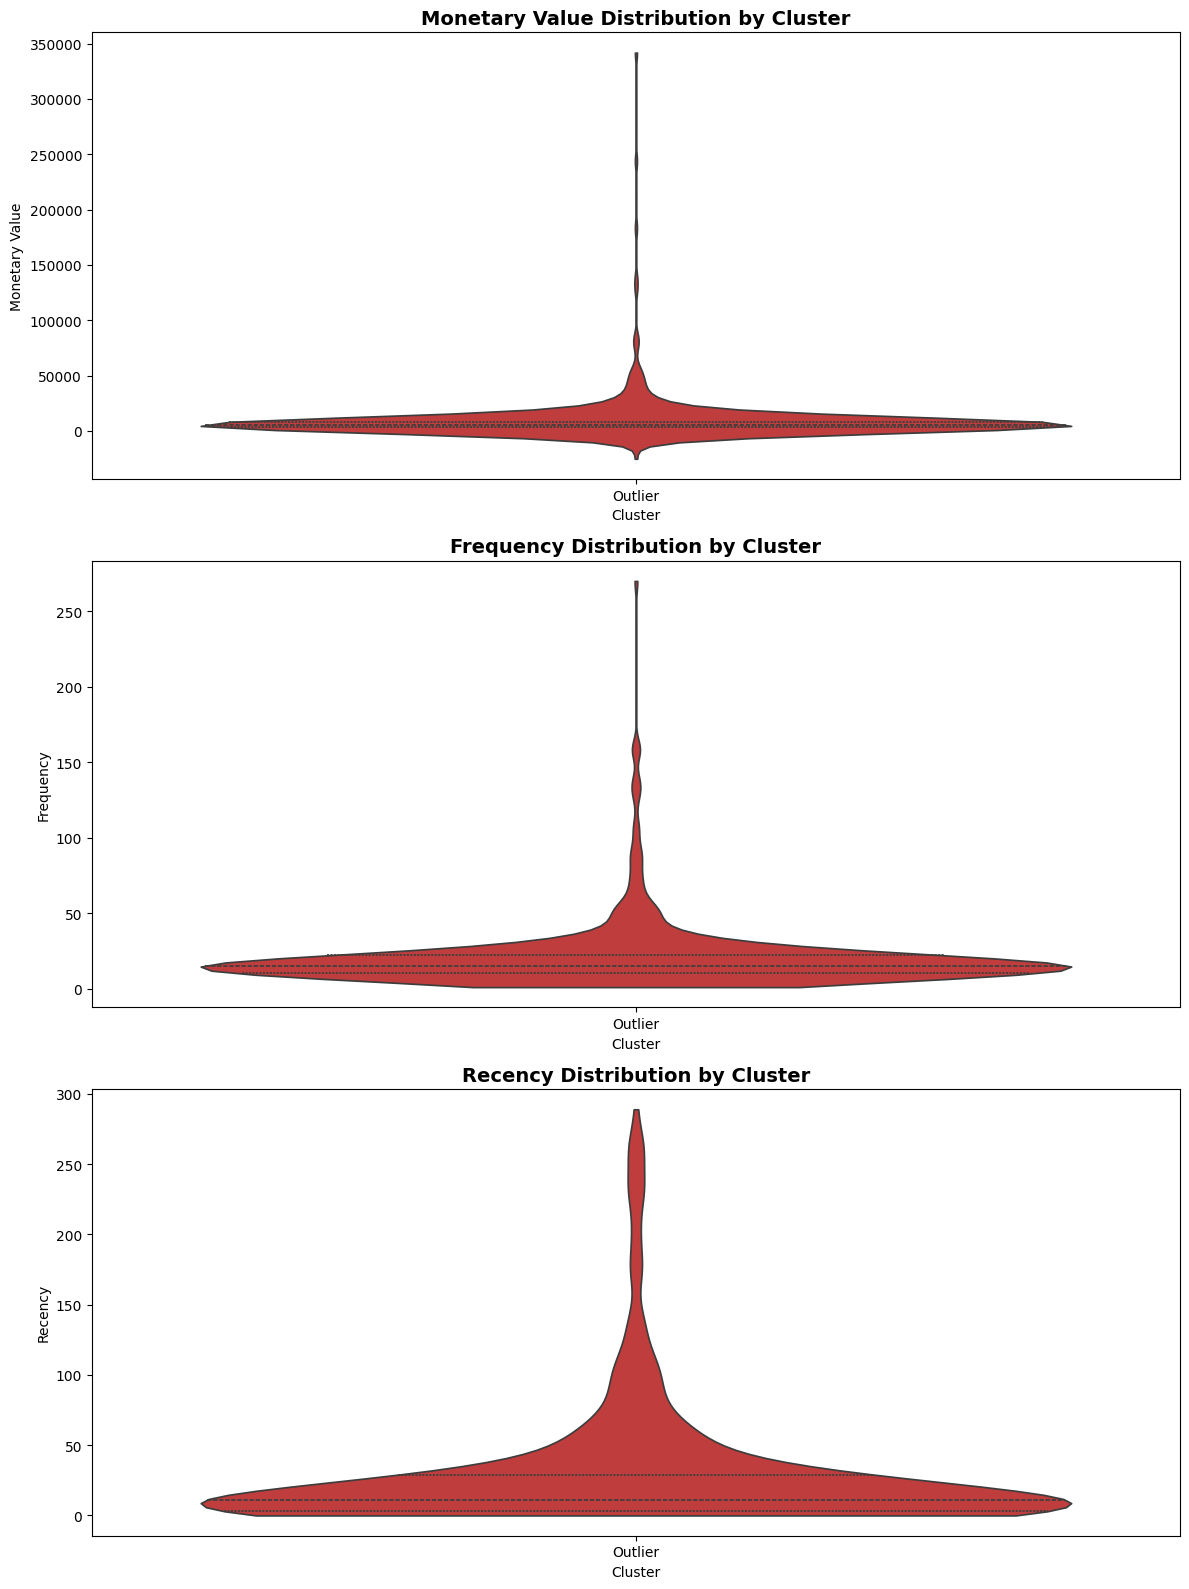

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# 1️⃣ PREPARE DATA
# -----------------------------

# Create a clean cluster label
outlier_clusters_df["ClusterLabel"] = outlier_clusters_df["Cluster"].apply(
    lambda x: "Outlier" if x < 0 else f"Cluster {x}"
)

# Ensure consistent order
cluster_order = sorted(outlier_clusters_df["ClusterLabel"].unique())

# -----------------------------
# 2️⃣ COLOR PALETTE (SAFE)
# -----------------------------

palette = {
    "Outlier": "#d62728",     # red
    "Cluster 0": "#1f77b4",   # blue
    "Cluster 1": "#2ca02c",   # green
    "Cluster 2": "#ff7f0e",   # orange
    "Cluster 3": "#9467bd"    # purple
}

# -----------------------------
# 3️⃣ VIOLIN PLOTS
# -----------------------------

plt.figure(figsize=(12, 16))

# 🔹 Monetary Value
plt.subplot(3, 1, 1)
sns.violinplot(
    data=outlier_clusters_df,
    x="ClusterLabel",
    y="monetaryValue",
    order=cluster_order,
    palette=palette,
    cut=0,
    inner="quartile"
)
plt.title("Monetary Value Distribution by Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster")
plt.ylabel("Monetary Value")

# 🔹 Frequency
plt.subplot(3, 1, 2)
sns.violinplot(
    data=outlier_clusters_df,
    x="ClusterLabel",
    y="frequency",
    order=cluster_order,
    palette=palette,
    cut=0,
    inner="quartile"
)
plt.title("Frequency Distribution by Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster")
plt.ylabel("Frequency")

# 🔹 Recency
plt.subplot(3, 1, 3)
sns.violinplot(
    data=outlier_clusters_df,
    x="ClusterLabel",
    y="Recency",
    order=cluster_order,
    palette=palette,
    cut=0,
    inner="quartile"
)
plt.title("Recency Distribution by Cluster", fontsize=14, fontweight="bold")
plt.xlabel("Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()
